# Random Forest

In [31]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import classification_report, mean_squared_error 
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, fbeta_score
from joblib import dump, load

import matplotlib.pyplot as plt
%matplotlib inline

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image


## Loading Data

In [32]:
filepath = "resources/"

# Loading scaled data
X_train_scaled = np.loadtxt(filepath + 'X_train_scaled.csv', delimiter=',')
X_test_scaled = np.loadtxt(filepath + 'X_test_scaled.csv', delimiter=',')

# Import SMOTE & Random Over Sampled data
# To import the X_train_smote, X_train_ros
X_train_smote = np.loadtxt(filepath + 'X_train_smote.csv', delimiter=',')
X_train_ros = np.loadtxt(filepath + 'X_train_ros.csv', delimiter=',')

# Import SMOTE & Random Over Sampled dataset Traget
# To import y_train_smote, y_train_ros
y_train_smote = pd.read_csv(filepath + 'y_train_smote.csv', sep=',', header=0, squeeze=True)
y_train_ros = pd.read_csv(filepath + 'y_train_ros.csv', sep=',', header=0, squeeze=True)

# Import raw target dataset
# To import y_train, y_test
y_train = pd.read_csv(filepath + 'y_train.csv', sep=',', header=0, squeeze=True, index_col=0)
y_test = pd.read_csv(filepath + 'y_test.csv', sep=',', header=0, squeeze=True, index_col=0)

# Importing feature headers
features = pd.read_csv(filepath + 'features.csv').drop(columns='Unnamed: 0')

---


## Fitting the Random Forest Model with scaled data

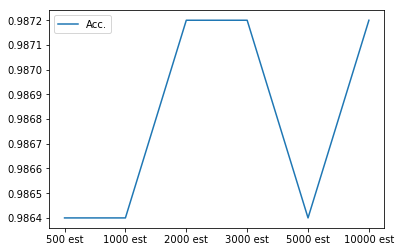

In [33]:
# Create a random forest classifier

''' 
We tested the model with different number of estimators to see the difference in accuracy:
With 500 estimators Acc 0.9864
With 1000 estimators Acc 0.9864
With 2000 estimators Acc 0.9872
With 3000 estimators Acc 0.9872
With 5000 estimators Acc 0.9864
With 10000 estimators Acc 0.9864
For this excercise we will use 2000 asi is the one with better 
accuracy with less estimators and a random_state of 42 to make 
the outcome consistent across calls
'''

est_dict = {
    "500 est": 0.9864,
    "1000 est": 0.9864,
    "2000 est": 0.9872,
    "3000 est": 0.9872,
    "5000 est": 0.9864,
    "10000 est": 0.9872
}

est_df = pd.DataFrame.from_dict(est_dict, orient='index')
est_df.columns = ['Acc.']
est_df.plot()

In [34]:
rf_model = RandomForestClassifier(n_estimators=2000, random_state=42)

In [35]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

#### Making Predictions Using the Decsion Tree Model

In [36]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

#### Model Evaluation

In [37]:
# Calculating the confusion matrix

cm = confusion_matrix(y_test, predictions)
cm_df_scaled = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score_scaled = accuracy_score(y_test, predictions)

Text(33.0, 0.5, 'Predicted')

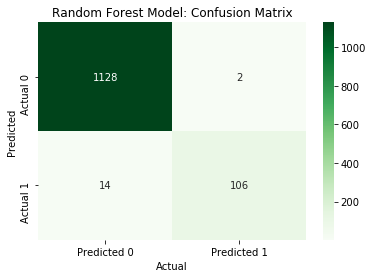

In [38]:
# Displaying results

# Display the confusion matrix
sns.heatmap(cm_df_scaled,
            cmap = 'Greens', 
            fmt = '', 
            annot = True)

# Set plot labels 
plt.title("Random Forest Model: Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")


In [39]:
print(f"Accuracy Score : {acc_score_scaled}")
print("Classification Report")
rf_cassrep_scaled = classification_report(y_test, predictions)
print(rf_cassrep_scaled)

Accuracy Score : 0.9872
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1130
           1       0.98      0.88      0.93       120

    accuracy                           0.99      1250
   macro avg       0.98      0.94      0.96      1250
weighted avg       0.99      0.99      0.99      1250



#### Scaled F-Beta Score

In [40]:
# Calculate Beta F1 Score
fbeta_scaled = fbeta_score(y_test, predictions,beta=0.5)

# Print the F1 score results
print("F1 Beta Score: %f" % (fbeta_scaled))

F1 Beta Score: 0.960145


#### Feature Importance

In [41]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

In [42]:
# Sorting the features by their importance
sorted(zip(rf_model.feature_importances_, features), reverse=True)

[(0.35297266061659477, 'Income'),
 (0.216468260753183, 'Education'),
 (0.15563830654690194, 'CCAvg'),
 (0.12157345183389277, 'Family'),
 (0.04908007565762149, 'CD Account'),
 (0.04638067248850292, 'Age'),
 (0.03534810821093613, 'Mortgage'),
 (0.009030149357119575, 'CreditCard'),
 (0.008417421281698933, 'Online'),
 (0.005090893253548486, 'Securities Account')]

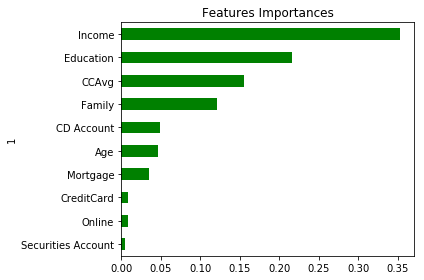

In [43]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, features), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='green', title= 'Features Importances', legend=False)
plt.tight_layout()
plt.savefig('images/rf_feat_scale.png')

#### MSE

In [44]:
mse_scaled = mean_squared_error(y_test, predictions)
print(mse_scaled)

0.0128


#### ROC curve

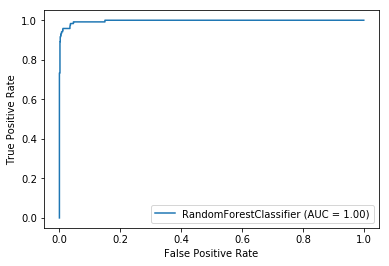

Scaled data Model: ROC-AUC Score: 0.9407817109144543


In [45]:
# ROC curve
svc_disp_scaled = plot_roc_curve(rf_model, X_test_scaled, y_test)
plt.show()

# Print the ROC-AUC Score
print("Scaled data Model: ROC-AUC Score:", roc_auc_score(y_test, predictions))

In [46]:
# Export model for load to dashboard
dump(rf_model, 'models/rf_scaled_model.joblib')

['models/rf_scaled_model.joblib']

---


## Fitting the Random Forest Model with SMOTE data

Text(33.0, 0.5, 'Predicted')

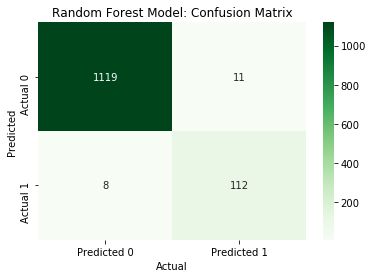

In [47]:
# Fitting the model
rf_model = rf_model.fit(X_train_smote, y_train_smote)
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df_smote = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
# Calculating the accuracy score
acc_score_smote = accuracy_score(y_test, predictions)
# Displaying results
# Display the confusion matrix
sns.heatmap(cm_df_smote,
            cmap = 'Greens', 
            fmt = '', 
            annot = True)

# Set plot labels 
plt.title("Random Forest Model: Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")


In [48]:
print(f"Accuracy Score : {acc_score_smote}")
print("Classification Report")
rf_cassrep_smote = classification_report(y_test, predictions)
print(rf_cassrep_smote)

Accuracy Score : 0.9848
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1130
           1       0.91      0.93      0.92       120

    accuracy                           0.98      1250
   macro avg       0.95      0.96      0.96      1250
weighted avg       0.98      0.98      0.98      1250



#### SMOTE F1 Beta

In [49]:
# Calculate Beta F1 Score
fbeta_SMOTE = fbeta_score(y_test, predictions,beta=0.5)

# Print the F1 score results
print("F1 Beta Score: %f" % (fbeta_SMOTE))

F1 Beta Score: 0.915033


#### Feature Importance SMOTE

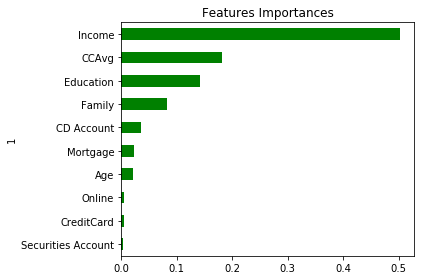

In [50]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# Sorting the features by their importance
sorted(zip(rf_model.feature_importances_, features), reverse=True)
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, features), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='green', title= 'Features Importances', legend=False)
plt.tight_layout()
plt.savefig('images/rf_feat_smote.png')

#### MSE SMOTE

In [51]:
mse_smote = mean_squared_error(y_test, predictions)
print(mse_smote)

0.0152


#### ROC curve SMOTE

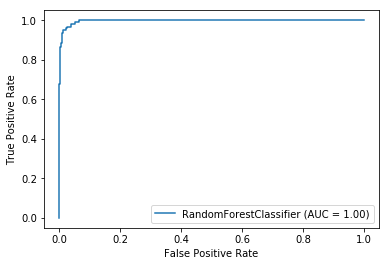

SMOTE Model: ROC-AUC Score: 0.9617994100294985


In [52]:
# Create ROC curve
svc_disp_smote = plot_roc_curve(rf_model, X_test_scaled, y_test)
plt.show()

# Print the ROC-AUC Score
print("SMOTE Model: ROC-AUC Score:", roc_auc_score(y_test, predictions))

In [53]:
# Export model for load to dashboard
dump(rf_model, 'models/rf_smote_model.joblib')

['models/rf_smote_model.joblib']

---


## Fitting the Random Forest Model with ROS data

Text(33.0, 0.5, 'Predicted')

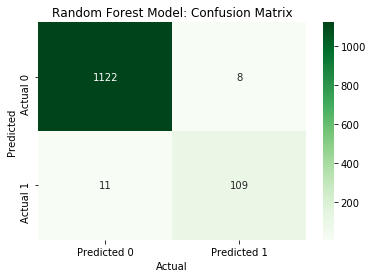

In [54]:
# Fitting the model
rf_model = rf_model.fit(X_train_ros, y_train_ros)
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df_ros = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
# Calculating the accuracy score
acc_score_ros = accuracy_score(y_test, predictions)
# Displaying results
# Display the confusion matrix
sns.heatmap(cm_df_ros,
            cmap = 'Greens', 
            fmt = '', 
            annot = True)

# Set plot labels 
plt.title("Random Forest Model: Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")


In [55]:
print(f"Accuracy Score : {acc_score_ros}")
print("Classification Report")
rf_cassrep_ros = classification_report(y_test, predictions)
print(rf_cassrep_ros)

Accuracy Score : 0.9848
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1130
           1       0.93      0.91      0.92       120

    accuracy                           0.98      1250
   macro avg       0.96      0.95      0.96      1250
weighted avg       0.98      0.98      0.98      1250



#### ROS F1 Beta

In [56]:
# Calculate Beta F1 Score
fbeta_ROS = fbeta_score(y_test, predictions,beta=0.5)

# Print the F1 score results
print("F1 Beta Score: %f" % (fbeta_ROS))

F1 Beta Score: 0.926871


#### Feature Importance ROS

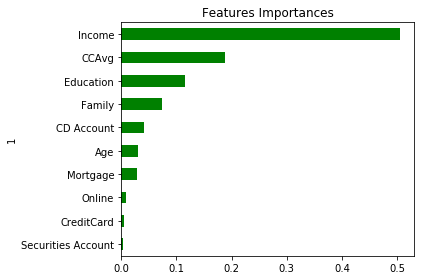

In [57]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# Sorting the features by their importance
sorted(zip(rf_model.feature_importances_, features), reverse=True)
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, features), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='green', title= 'Features Importances', legend=False)
plt.tight_layout()
plt.savefig('images/rf_feat_ros.png')

#### MSE ROS

In [58]:
mse_ros = mean_squared_error(y_test, predictions)
print(mse_ros)

0.0152


#### ROC - AUC curve ROS

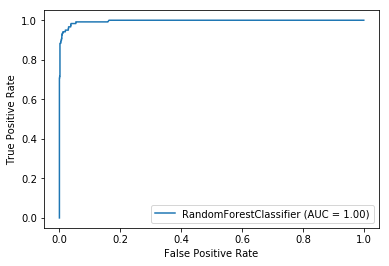

ROS Model: ROC-AUC Score: 0.9506268436578169


In [59]:
# Create the ROC curve
svc_disp_ros = plot_roc_curve(rf_model, X_test_scaled, y_test)
plt.show()

# Print the ROC-AUC Score
print("ROS Model: ROC-AUC Score:", roc_auc_score(y_test, predictions))

In [60]:
# Export model for load to dashboard
dump(rf_model, 'models/rf_ros_model.joblib')

['models/rf_ros_model.joblib']

---

### Random Forest: Model Comparison & Conclusions

#### Accuracy Scores

In [62]:
# Create the model accuracy scores dataframe
accuracy_scores_model = pd.DataFrame({
    "Model Dataset" : ["Scaled Accuracy Score",
                       "SMOTE Accuracy Score",
                       "ROS Accuracy Score"],
    "Score" : [acc_score_scaled,acc_score_smote,acc_score_ros]
})

# Display the accuracy scores dataframe
accuracy_scores_model

,Model Dataset,Score
0,Scaled Accuracy Score,0.9872
1,SMOTE Accuracy Score,0.9848
2,ROS Accuracy Score,0.9848


##### Accuracy Score Conclusions 

We are not considering the model with the scaled data as the scaled data is inbalanced. The model with SMOTE data produces a higher accuracy score.

#### Confusion Matrix

##### Scaled Data

Text(33.0, 0.5, 'Predicted')

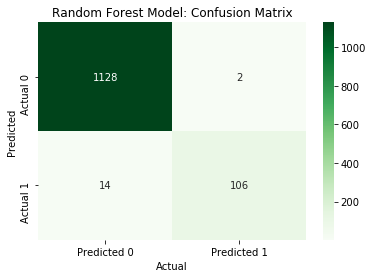

In [63]:
# Display the confusion matrix
sns.heatmap(cm_df_scaled,
            cmap = 'Greens', 
            fmt = '', 
            annot = True)

# Set plot labels 
plt.title("Random Forest Model: Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")

##### SMOTE

Text(33.0, 0.5, 'Predicted')

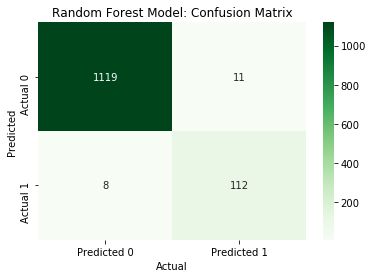

In [64]:
# Display the confusion matrix
sns.heatmap(cm_df_smote,
            cmap = 'Greens', 
            fmt = '', 
            annot = True)

# Set plot labels 
plt.title("Random Forest Model: Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")

##### ROS

Text(33.0, 0.5, 'Predicted')

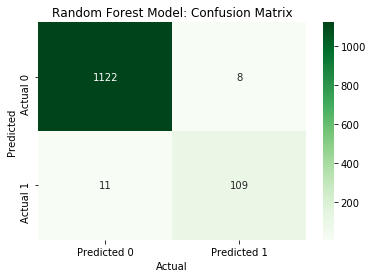

In [65]:
# Display the confusion matrix
sns.heatmap(cm_df_ros,
            cmap = 'Greens', 
            fmt = '', 
            annot = True)

# Set plot labels 
plt.title("Random Forest Model: Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")

#### Classification Report

##### Scaled

In [66]:
print(rf_cassrep_scaled)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1130
           1       0.98      0.88      0.93       120

    accuracy                           0.99      1250
   macro avg       0.98      0.94      0.96      1250
weighted avg       0.99      0.99      0.99      1250



##### SMOTE

In [67]:
print(rf_cassrep_smote)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1130
           1       0.91      0.93      0.92       120

    accuracy                           0.98      1250
   macro avg       0.95      0.96      0.96      1250
weighted avg       0.98      0.98      0.98      1250



##### ROS

In [68]:
print(rf_cassrep_ros)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1130
           1       0.93      0.91      0.92       120

    accuracy                           0.98      1250
   macro avg       0.96      0.95      0.96      1250
weighted avg       0.98      0.98      0.98      1250



#### MSE

In [69]:
# Create the model MSE scores dataframe
mse_scores_model = pd.DataFrame({
    "Model Dataset" : ["Scaled MSE",
                       "SMOTE MSE",
                       "ROS MSE"],
    "Score" : [mse_scaled,mse_smote,mse_ros]
})

# Display the MSE scores dataframe
mse_scores_model

,Model Dataset,Score
0,Scaled MSE,0.0128
1,SMOTE MSE,0.0152
2,ROS MSE,0.0152


#### ROC curve

##### Scaled

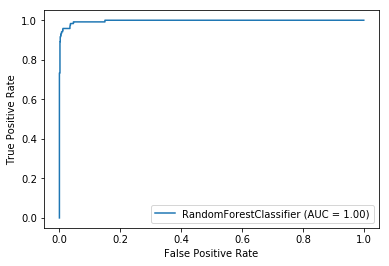

In [70]:
svc_disp_scaled.plot()

##### SMOTE

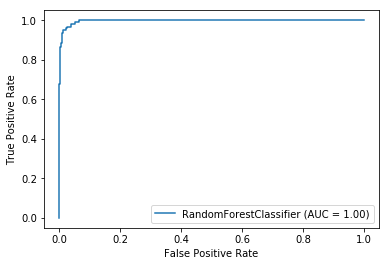

In [71]:
svc_disp_smote.plot()

##### ROS

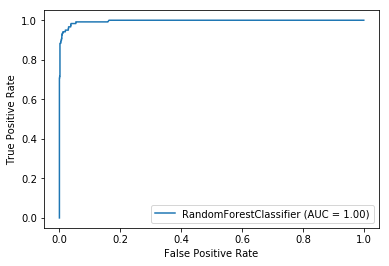

In [72]:
svc_disp_ros.plot()

#### F-Beta Scores

In [73]:
# Create the model Fbeta
fbeta_df = pd.DataFrame({
    "Model" : ["Scaled", 
                       "SMOTE", 
                       "ROS"], 
    "Score" : [fbeta_scaled, fbeta_SMOTE, fbeta_ROS]
})

# Display the dataframe
fbeta_df

,Model,Score
0,Scaled,0.960145
1,SMOTE,0.915033
2,ROS,0.926871


##### F-Beta Scores Conclusions:

F1 Beta weighs higher the recall than the precision. 
We have identified the recall as the most relevant matric for evaluation thus we are using the F1 Beta score. We are disregarding the model feeded with the scaled only data as it is imbalanced. From the resulting two, the onw with the highest score is the one with ROS data.

### Final Analysis:

Objective: Get predictions regardining the likelihood of a customer taking out a personal loan. 

Recall and F1 Beta as evaluation metric: We identified Recall as the most relevan metric to compare the models. F1 Beta gives a higher weight to recall thus we are using this metric instead of the regular F1.

**Model Selected:** ROS Random Forest Model

* Recall: 99%
* Weighted F1 Score: 92.68
* Accuracy Score: 98
* Balanced Accuracy Score: 96
* ROC-AUC: 96

---
